In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 234

This script analyse this association rules find in the last version

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv10.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Firebird'}),frozenset({'Ingres'}),0.047619,0.021645,0.021645,0.454545,21.000000,0.020614,1.793651,1,1
1,frozenset({'Ingres'}),frozenset({'Firebird'}),0.021645,0.047619,0.021645,1.000000,21.000000,0.020614,inf,1,1
2,frozenset({'Informix'}),frozenset({'SAP Adaptive Server'}),0.043290,0.034632,0.025974,0.600000,17.325000,0.024475,2.413420,1,1
3,frozenset({'SAP Adaptive Server'}),frozenset({'Informix'}),0.034632,0.043290,0.025974,0.750000,17.325000,0.024475,3.826840,1,1
4,frozenset({'MS Access'}),frozenset({'Informix'}),0.030303,0.043290,0.021645,0.714286,16.500000,0.020333,3.348485,1,1
...,...,...,...,...,...,...,...,...,...,...,...
463,frozenset({'Hazelcast'}),frozenset({'MySQL'}),0.073593,0.484848,0.043290,0.588235,1.213235,0.007609,1.251082,1,1
464,frozenset({'H2'}),frozenset({'HBase'}),0.389610,0.064935,0.030303,0.077778,1.197778,0.005004,1.013926,1,1
465,frozenset({'HBase'}),frozenset({'H2'}),0.064935,0.389610,0.030303,0.466667,1.197778,0.005004,1.144481,1,1
466,frozenset({'DynamoDB'}),frozenset({'H2'}),0.125541,0.389610,0.056277,0.448276,1.150575,0.007365,1.106331,1,1


In [3]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [4]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,0.021645,0.021645,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,0.047619,0.021645,1.000000,21.000000,0.020614,inf,1,1
2,Informix,SAP Adaptive Server,0.043290,0.034632,0.025974,0.600000,17.325000,0.024475,2.413420,1,1
3,SAP Adaptive Server,Informix,0.034632,0.043290,0.025974,0.750000,17.325000,0.024475,3.826840,1,1
4,MS Access,Informix,0.030303,0.043290,0.021645,0.714286,16.500000,0.020333,3.348485,1,1
...,...,...,...,...,...,...,...,...,...,...,...
463,Hazelcast,MySQL,0.073593,0.484848,0.043290,0.588235,1.213235,0.007609,1.251082,1,1
464,H2,HBase,0.389610,0.064935,0.030303,0.077778,1.197778,0.005004,1.013926,1,1
465,HBase,H2,0.064935,0.389610,0.030303,0.466667,1.197778,0.005004,1.144481,1,1
466,DynamoDB,H2,0.125541,0.389610,0.056277,0.448276,1.150575,0.007365,1.106331,1,1


In [5]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
2,Informix,SAP Adaptive Server,0.043290,10.129870,0.034632,8.103896,0.025974,6.077922,0.600000,17.325000,0.024475,2.413420,1,1
3,SAP Adaptive Server,Informix,0.034632,8.103896,0.043290,10.129870,0.025974,6.077922,0.750000,17.325000,0.024475,3.826840,1,1
4,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Hazelcast,MySQL,0.073593,17.220779,0.484848,113.454545,0.043290,10.129870,0.588235,1.213235,0.007609,1.251082,1,1
464,H2,HBase,0.389610,91.168831,0.064935,15.194805,0.030303,7.090909,0.077778,1.197778,0.005004,1.013926,1,1
465,HBase,H2,0.064935,15.194805,0.389610,91.168831,0.030303,7.090909,0.466667,1.197778,0.005004,1.144481,1,1
466,DynamoDB,H2,0.125541,29.376623,0.389610,91.168831,0.056277,13.168831,0.448276,1.150575,0.007365,1.106331,1,1


In [6]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
2,Informix,SAP Adaptive Server,0.043290,10.129870,0.034632,8.103896,0.025974,6.077922,0.600000,17.325000,0.024475,2.413420,1,1
3,SAP Adaptive Server,Informix,0.034632,8.103896,0.043290,10.129870,0.025974,6.077922,0.750000,17.325000,0.024475,3.826840,1,1
4,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Hazelcast,MySQL,0.073593,17.220779,0.484848,113.454545,0.043290,10.129870,0.588235,1.213235,0.007609,1.251082,1,1
464,H2,HBase,0.389610,91.168831,0.064935,15.194805,0.030303,7.090909,0.077778,1.197778,0.005004,1.013926,1,1
465,HBase,H2,0.064935,15.194805,0.389610,91.168831,0.030303,7.090909,0.466667,1.197778,0.005004,1.144481,1,1
466,DynamoDB,H2,0.125541,29.376623,0.389610,91.168831,0.056277,13.168831,0.448276,1.150575,0.007365,1.106331,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [7]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
377,PostgreSQL,MySQL,0.402597,94.207792,0.484848,113.454545,0.329004,76.987013,0.817204,1.685484,0.133806,2.818182,1,1
376,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76.987013,0.678571,1.685484,0.133806,1.858586,1,1
417,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67.870130,0.598214,1.535417,0.101141,1.519192,1,1
416,H2,MySQL,0.389610,91.168831,0.484848,113.454545,0.290043,67.870130,0.744444,1.535417,0.101141,2.015810,1,1
407,Oracle,MySQL,0.341991,80.025974,0.484848,113.454545,0.264069,61.792208,0.772152,1.592563,0.098255,2.260943,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Microsoft Azure CosmosDB,MS SQL Server,0.030303,7.090909,0.238095,55.714286,0.021645,5.064935,0.714286,3.000000,0.014430,2.666667,1,1
155,MS Access,MS SQL Server,0.030303,7.090909,0.238095,55.714286,0.021645,5.064935,0.714286,3.000000,0.014430,2.666667,1,1
172,Ingres,Oracle,0.021645,5.064935,0.341991,80.025974,0.021645,5.064935,1.000000,2.924051,0.014243,inf,1,1
173,Oracle,Ingres,0.341991,80.025974,0.021645,5.064935,0.021645,5.064935,0.063291,2.924051,0.014243,1.044460,1,1


In [8]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,113.454545,0.116306,27.215584,0.094372,22.083117,0.194643,1.805818,0.037982,1.139251,1.0,1.0
PostgreSQL,0.402597,94.207792,0.119048,27.857143,0.088456,20.698701,0.219713,2.054191,0.040528,1.218046,1.0,1.0
H2,0.389610,91.168831,0.133533,31.246753,0.086580,20.259740,0.222222,1.842446,0.034554,1.174398,1.0,1.0
Redis,0.350649,82.051948,0.147776,34.579693,0.083628,19.569067,0.238496,1.899892,0.031811,1.158954,1.0,1.0
Oracle,0.341991,80.025974,0.126314,29.557514,0.082560,19.319109,0.241410,2.237130,0.039362,1.254447,1.0,1.0
HyperSQL,0.242424,56.727273,0.157081,36.756957,0.075036,17.558442,0.309524,2.594957,0.036956,1.368591,1.0,1.0
MS SQL Server,0.238095,55.714286,0.131416,30.751391,0.071119,16.641929,0.298701,2.769274,0.039830,1.889820,1.0,1.0
MongoDB,0.186147,43.558442,0.153586,35.939018,0.058724,13.741389,0.315470,2.853997,0.030134,1.332750,1.0,1.0
IBM DB2,0.134199,31.402597,0.160998,37.673469,0.059575,13.940631,0.443932,4.048835,0.037970,NaN,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [9]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.116306,27.215584,0.484848,113.454545,0.094372,22.083117,0.875548,1.805818,0.037982,NaN,1.0,1.0
PostgreSQL,0.119048,27.857143,0.402597,94.207792,0.088456,20.698701,0.827012,2.054191,0.040528,NaN,1.0,1.0
H2,0.133533,31.246753,0.389610,91.168831,0.086580,20.259740,0.717836,1.842446,0.034554,NaN,1.0,1.0
Redis,0.147776,34.579693,0.350649,82.051948,0.083628,19.569067,0.666196,1.899892,0.031811,NaN,1.0,1.0
Oracle,0.126314,29.557514,0.341991,80.025974,0.082560,19.319109,0.765079,2.237130,0.039362,NaN,1.0,1.0
HyperSQL,0.157081,36.756957,0.242424,56.727273,0.075036,17.558442,0.629080,2.594957,0.036956,NaN,1.0,1.0
MS SQL Server,0.131416,30.751391,0.238095,55.714286,0.071119,16.641929,0.659351,2.769274,0.039830,NaN,1.0,1.0
MongoDB,0.153586,35.939018,0.186147,43.558442,0.058724,13.741389,0.531264,2.853997,0.030134,NaN,1.0,1.0
IBM DB2,0.160998,37.673469,0.134199,31.402597,0.059575,13.940631,0.543350,4.048835,0.037970,NaN,1.0,1.0


In [10]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support','antecedent_sup_abs'], ascending=[False,False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                             
MySQL       PostgreSQL               0.484848          113.454545   
PostgreSQL  MySQL                    0.402597           94.207792   
MySQL       H2                       0.484848          113.454545   
H2          MySQL                    0.389610           91.168831   
MySQL       Oracle                   0.484848          113.454545   
...                                       ...                 ...   
Ingres      IBM DB2                  0.021645            5.064935   
            MS SQL Server            0.021645            5.064935   
            MySQL                    0.021645            5.064935   
            Oracle                   0.021645            5.064935   
            PostgreSQL               0.021645            5.064935   

                           consequent support  consequent_sup_abs   support  \
antecedents consequents                                                       
MySQL       PostgreSQL               0.402597           94.207792  0.329004   
PostgreSQL  MySQL                    0.484848          113.454545  0.329004   
MySQL       H2                       0.389610           91.168831  0.290043   
H2          MySQL                    0.484848          113.454545  0.290043   
MySQL       Oracle                   0.341991           80.025974  0.264069   
...                                       ...                 ...       ...   
Ingres      IBM DB2                  0.134199           31.402597  0.021645   
            MS SQL Server            0.238095           55.714286  0.021645   
            MySQL                    0.484848          113.454545  0.021645   
            Oracle                   0.341991           80.025974  0.021645   
            PostgreSQL               0.402597           94.207792  0.021645   

                           support_abs  confidence      lift  leverage  \
antecedents consequents                                                  
MySQL       PostgreSQL       76.987013    0.678571  1.685484  0.133806   
PostgreSQL  MySQL            76.987013    0.817204  1.685484  0.133806   
MySQL       H2               67.870130    0.598214  1.535417  0.101141   
H2          MySQL            67.870130    0.744444  1.535417  0.101141   
MySQL       Oracle           61.792208    0.544643  1.592563  0.098255   
...                                ...         ...       ...       ...   
Ingres      IBM DB2           5.064935    1.000000  7.451613  0.018740   
            MS SQL Server     5.064935    1.000000  4.200000  0.016491   
            MySQL             5.064935    1.000000  2.062500  0.011150   
            Oracle            5.064935    1.000000  2.924051  0.014243   
            PostgreSQL        5.064935    1.000000  2.483871  0.012931   

                           conviction  antecedent_len  consequente_len  
antecedents consequents                                                 
MySQL       PostgreSQL       1.858586             1.0              1.0  
PostgreSQL  MySQL            2.818182             1.0              1.0  
MySQL       H2               1.519192             1.0              1.0  
H2          MySQL            2.015810             1.0              1.0  
MySQL       Oracle           1.445039             1.0              1.0  
...                               ...             ...              ...  
Ingres      IBM DB2               inf             1.0              1.0  
            MS SQL Server         inf             1.0              1.0  
            MySQL                 inf             1.0              1.0  
            Oracle                inf             1.0              1.0  
            PostgreSQL            inf             1.0              1.0  

[468 rows x 12 columns]

In [11]:
# In this section we eliminate the inverted rules
#Always run this before reset.index()
#Used only for the correlation diagram
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                                   
MySQL       PostgreSQL                     0.484848          113.454545   
            H2                             0.484848          113.454545   
            Oracle                         0.484848          113.454545   
PostgreSQL  H2                             0.402597           94.207792   
            Oracle                         0.402597           94.207792   
...                                             ...                 ...   
Firebird    Ingres                         0.047619           11.142857   
            SAP Adaptive Server            0.047619           11.142857   
Informix    MS Access                      0.043290           10.129870   
            SapHana                        0.043290           10.129870   
            Teradata                       0.043290           10.129870   

                                 consequent support  consequent_sup_abs  \
antecedents consequents                                                   
MySQL       PostgreSQL                     0.402597           94.207792   
            H2                             0.389610           91.168831   
            Oracle                         0.341991           80.025974   
PostgreSQL  H2                             0.389610           91.168831   
            Oracle                         0.341991           80.025974   
...                                             ...                 ...   
Firebird    Ingres                         0.021645            5.064935   
            SAP Adaptive Server            0.034632            8.103896   
Informix    MS Access                      0.030303            7.090909   
            SapHana                        0.038961            9.116883   
            Teradata                       0.034632            8.103896   

                                  support  support_abs  confidence       lift  \
antecedents consequents                                                         
MySQL       PostgreSQL           0.329004    76.987013    0.678571   1.685484   
            H2                   0.290043    67.870130    0.598214   1.535417   
            Oracle               0.264069    61.792208    0.544643   1.592563   
PostgreSQL  H2                   0.264069    61.792208    0.655914   1.683513   
            Oracle               0.264069    61.792208    0.655914   1.917926   
...                                   ...          ...         ...        ...   
Firebird    Ingres               0.021645     5.064935    0.454545  21.000000   
            SAP Adaptive Server  0.021645     5.064935    0.454545  13.125000   
Informix    MS Access            0.021645     5.064935    0.500000  16.500000   
            SapHana              0.021645     5.064935    0.500000  12.833333   
            Teradata             0.021645     5.064935    0.500000  14.437500   

                                 leverage  conviction  antecedent_len  \
antecedents consequents                                                 
MySQL       PostgreSQL           0.133806    1.858586             1.0   
            H2                   0.101141    1.519192             1.0   
            Oracle               0.098255    1.445039             1.0   
PostgreSQL  H2                   0.107213    1.773945             1.0   
            Oracle               0.126384    1.912338             1.0   
...                                   ...         ...             ...   
Firebird    Ingres               0.020614    1.793651             1.0   
            SAP Adaptive Server  0.019996    1.769841             1.0   
Informix    MS Access            0.020333    1.939394             1.0   
            SapHana              0.019958    1.922078             1.0   
            Teradata             0.020146    1.930736             1.0   

                                 consequente_len  
antecedents consequents   

In [12]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76.987013,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67.870130,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,113.454545,0.341991,80.025974,0.264069,61.792208,0.544643,1.592563,0.098255,1.445039,1.0,1.0
3,PostgreSQL,H2,0.402597,94.207792,0.389610,91.168831,0.264069,61.792208,0.655914,1.683513,0.107213,1.773945,1.0,1.0
4,PostgreSQL,Oracle,0.402597,94.207792,0.341991,80.025974,0.264069,61.792208,0.655914,1.917926,0.126384,1.912338,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1.0,1.0
230,Firebird,SAP Adaptive Server,0.047619,11.142857,0.034632,8.103896,0.021645,5.064935,0.454545,13.125000,0.019996,1.769841,1.0,1.0
231,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1.0,1.0
232,Informix,SapHana,0.043290,10.129870,0.038961,9.116883,0.021645,5.064935,0.500000,12.833333,0.019958,1.922078,1.0,1.0


In [13]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv10.xlsx', index=False)

This chart shows all the rules for the BDs used together in last version.

In [14]:
#Graph generated with all rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in last version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],width = 1000, height=1000, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [15]:
#Test showing the rules without inverted repetitions and without the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], width = 1000, height=1000, text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [16]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c
order

{'MySQL': 1,
 'PostgreSQL': 2,
 'H2': 3,
 'Oracle': 4,
 'Redis': 5,
 'HyperSQL': 6,
 'MS SQL Server': 7,
 'MongoDB': 8,
 'IBM DB2': 9,
 'DynamoDB': 10,
 'Google Cloud Datastore': 11,
 'SQLite': 12,
 'Cassandra': 13,
 'Firebird': 14,
 'Hazelcast': 15,
 'Informix': 16,
 'HBase': 17,
 'MarkLogic': 18,
 'ClickHouse': 19,
 'Neo4j': 20,
 'PostGIS': 21,
 'SapHana': 22,
 'SAP Adaptive Server': 23,
 'Teradata': 24,
 'Snowflake': 25,
 'MS Access': 26,
 'Microsoft Azure CosmosDB': 27,
 'Influx DB': 28,
 'Couchbase': 29,
 'Etcd': 30,
 'Ingres': 31}

In [17]:
#if you need to generate the rules in excel
rules_filter = orules1c.to_excel('rules_filtersv10_order.xlsx', index=False)

In [18]:
orules1c = orules1c.set_index(['antecedents','consequents'])
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                                   
MySQL       PostgreSQL                     0.484848          113.454545   
            H2                             0.484848          113.454545   
            Oracle                         0.484848          113.454545   
            Redis                          0.484848          113.454545   
            HyperSQL                       0.484848          113.454545   
...                                             ...                 ...   
Informix    SapHana                        0.043290           10.129870   
            SAP Adaptive Server            0.043290           10.129870   
            Teradata                       0.043290           10.129870   
            MS Access                      0.043290           10.129870   
HBase       ClickHouse                     0.064935           15.194805   

                                 consequent support  consequent_sup_abs  \
antecedents consequents                                                   
MySQL       PostgreSQL                     0.402597           94.207792   
            H2                             0.389610           91.168831   
            Oracle                         0.341991           80.025974   
            Redis                          0.350649           82.051948   
            HyperSQL                       0.242424           56.727273   
...                                             ...                 ...   
Informix    SapHana                        0.038961            9.116883   
            SAP Adaptive Server            0.034632            8.103896   
            Teradata                       0.034632            8.103896   
            MS Access                      0.030303            7.090909   
HBase       ClickHouse                     0.047619           11.142857   

                                  support  support_abs  confidence       lift  \
antecedents consequents                                                         
MySQL       PostgreSQL           0.329004           76    0.678571   1.685484   
            H2                   0.290043           67    0.598214   1.535417   
            Oracle               0.264069           61    0.544643   1.592563   
            Redis                0.242424           56    0.500000   1.425926   
            HyperSQL             0.203463           47    0.419643   1.731027   
...                                   ...          ...         ...        ...   
Informix    SapHana              0.021645            5    0.500000  12.833333   
            SAP Adaptive Server  0.025974            6    0.600000  17.325000   
            Teradata             0.021645            5    0.500000  14.437500   
            MS Access            0.021645            5    0.500000  16.500000   
HBase       ClickHouse           0.021645            5    0.333333   7.000000   

                                 leverage  conviction  antecedent_len  \
antecedents consequents                                                 
MySQL       PostgreSQL           0.133806    1.858586             1.0   
            H2                   0.101141    1.519192             1.0   
            Oracle               0.098255    1.445039             1.0   
            Redis                0.072412    1.298701             1.0   
            HyperSQL             0.085924    1.305361             1.0   
...                                   ...         ...             ...   
Informix    SapHana              0.019958    1.922078             1.0   
            SAP Adaptive Server  0.024475    2.413420             1.0   
            Teradata             0.020146    1.930736             1.0   
            MS Access            0.020333    1.939394             1.0   
HBase       ClickHouse           0.018553    1.428571             1.0   

                                 consequente_len  
antecedents consequents   

In [19]:
orules1c.dtypes

antecedent support    float64
antecedent_sup_abs    float64
consequent support    float64
consequent_sup_abs    float64
support               float64
support_abs             int64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
antecedent_len        float64
consequente_len       float64
dtype: object

In [20]:
#Removing after ordination
#orules1c['support_abs'] = orules1c['support_abs'].astype(int)
# In this section we eliminate the inverted rules
#Always run this for before reset.index()
new_index = []

for index in orules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(orules1c.index)
orules1c = orules1c.loc[new_index,:]
orules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                                   
MySQL       PostgreSQL                     0.484848          113.454545   
            H2                             0.484848          113.454545   
            Oracle                         0.484848          113.454545   
            Redis                          0.484848          113.454545   
            HyperSQL                       0.484848          113.454545   
...                                             ...                 ...   
Informix    SapHana                        0.043290           10.129870   
            SAP Adaptive Server            0.043290           10.129870   
            Teradata                       0.043290           10.129870   
            MS Access                      0.043290           10.129870   
HBase       ClickHouse                     0.064935           15.194805   

                                 consequent support  consequent_sup_abs  \
antecedents consequents                                                   
MySQL       PostgreSQL                     0.402597           94.207792   
            H2                             0.389610           91.168831   
            Oracle                         0.341991           80.025974   
            Redis                          0.350649           82.051948   
            HyperSQL                       0.242424           56.727273   
...                                             ...                 ...   
Informix    SapHana                        0.038961            9.116883   
            SAP Adaptive Server            0.034632            8.103896   
            Teradata                       0.034632            8.103896   
            MS Access                      0.030303            7.090909   
HBase       ClickHouse                     0.047619           11.142857   

                                  support  support_abs  confidence       lift  \
antecedents consequents                                                         
MySQL       PostgreSQL           0.329004           76    0.678571   1.685484   
            H2                   0.290043           67    0.598214   1.535417   
            Oracle               0.264069           61    0.544643   1.592563   
            Redis                0.242424           56    0.500000   1.425926   
            HyperSQL             0.203463           47    0.419643   1.731027   
...                                   ...          ...         ...        ...   
Informix    SapHana              0.021645            5    0.500000  12.833333   
            SAP Adaptive Server  0.025974            6    0.600000  17.325000   
            Teradata             0.021645            5    0.500000  14.437500   
            MS Access            0.021645            5    0.500000  16.500000   
HBase       ClickHouse           0.021645            5    0.333333   7.000000   

                                 leverage  conviction  antecedent_len  \
antecedents consequents                                                 
MySQL       PostgreSQL           0.133806    1.858586             1.0   
            H2                   0.101141    1.519192             1.0   
            Oracle               0.098255    1.445039             1.0   
            Redis                0.072412    1.298701             1.0   
            HyperSQL             0.085924    1.305361             1.0   
...                                   ...         ...             ...   
Informix    SapHana              0.019958    1.922078             1.0   
            SAP Adaptive Server  0.024475    2.413420             1.0   
            Teradata             0.020146    1.930736             1.0   
            MS Access            0.020333    1.939394             1.0   
HBase       ClickHouse           0.018553    1.428571             1.0   

                                 consequente_len  
antecedents consequents   

In [21]:
orules1c = orules1c.reset_index()
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c


,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67,0.598214,1.535417,0.101141,1.519192,1.0,1.0
2,MySQL,Oracle,0.484848,113.454545,0.341991,80.025974,0.264069,61,0.544643,1.592563,0.098255,1.445039,1.0,1.0
3,MySQL,Redis,0.484848,113.454545,0.350649,82.051948,0.242424,56,0.500000,1.425926,0.072412,1.298701,1.0,1.0
4,MySQL,HyperSQL,0.484848,113.454545,0.242424,56.727273,0.203463,47,0.419643,1.731027,0.085924,1.305361,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Informix,SapHana,0.043290,10.129870,0.038961,9.116883,0.021645,5,0.500000,12.833333,0.019958,1.922078,1.0,1.0
230,Informix,SAP Adaptive Server,0.043290,10.129870,0.034632,8.103896,0.025974,6,0.600000,17.325000,0.024475,2.413420,1.0,1.0
231,Informix,Teradata,0.043290,10.129870,0.034632,8.103896,0.021645,5,0.500000,14.437500,0.020146,1.930736,1.0,1.0
232,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5,0.500000,16.500000,0.020333,1.939394,1.0,1.0


In [22]:
#Test showing the rules without inverted repetitions and with the sort function
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],width = 800, height=800,text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [23]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot2 = orules1c.pivot(index='Consequents', columns='Antecedents', values='support_abs')
pivot_filled = pivot.combine_first(pivot2)

pivot_filled

,MySQL,PostgreSQL,H2,Oracle,Redis,HyperSQL,MS SQL Server,MongoDB,IBM DB2,DynamoDB,...,SapHana,SAP Adaptive Server,Teradata,Snowflake,MS Access,Microsoft Azure CosmosDB,Influx DB,Couchbase,Etcd,Ingres
MySQL,NaN,76.0,67.0,61.0,56.0,47.0,53.0,33.0,31.0,18.0,...,9.0,8.0,8.0,8.0,7.0,7.0,6.0,6.0,6.0,5.0
PostgreSQL,76.0,NaN,61.0,61.0,49.0,40.0,47.0,28.0,31.0,15.0,...,9.0,8.0,7.0,7.0,7.0,5.0,6.0,6.0,5.0,5.0
H2,67.0,61.0,NaN,51.0,44.0,33.0,39.0,31.0,26.0,13.0,...,8.0,8.0,7.0,6.0,6.0,NaN,NaN,NaN,NaN,5.0
Oracle,61.0,61.0,51.0,NaN,40.0,37.0,46.0,24.0,29.0,13.0,...,9.0,8.0,7.0,6.0,7.0,NaN,5.0,6.0,5.0,5.0
Redis,56.0,49.0,44.0,40.0,NaN,29.0,33.0,27.0,16.0,13.0,...,5.0,NaN,NaN,NaN,NaN,6.0,6.0,6.0,5.0,NaN
HyperSQL,47.0,40.0,33.0,37.0,29.0,NaN,31.0,15.0,22.0,NaN,...,7.0,8.0,6.0,NaN,7.0,NaN,NaN,NaN,NaN,5.0
MS SQL Server,53.0,47.0,39.0,46.0,33.0,31.0,NaN,21.0,26.0,11.0,...,9.0,8.0,6.0,6.0,5.0,5.0,NaN,6.0,NaN,5.0
MongoDB,33.0,28.0,31.0,24.0,27.0,15.0,21.0,NaN,11.0,12.0,...,6.0,NaN,5.0,NaN,NaN,5.0,6.0,5.0,5.0,NaN
IBM DB2,31.0,31.0,26.0,29.0,16.0,22.0,26.0,11.0,NaN,NaN,...,8.0,8.0,6.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
DynamoDB,18.0,15.0,13.0,13.0,13.0,NaN,11.0,12.0,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,6.0,5.0,NaN,5.0,NaN


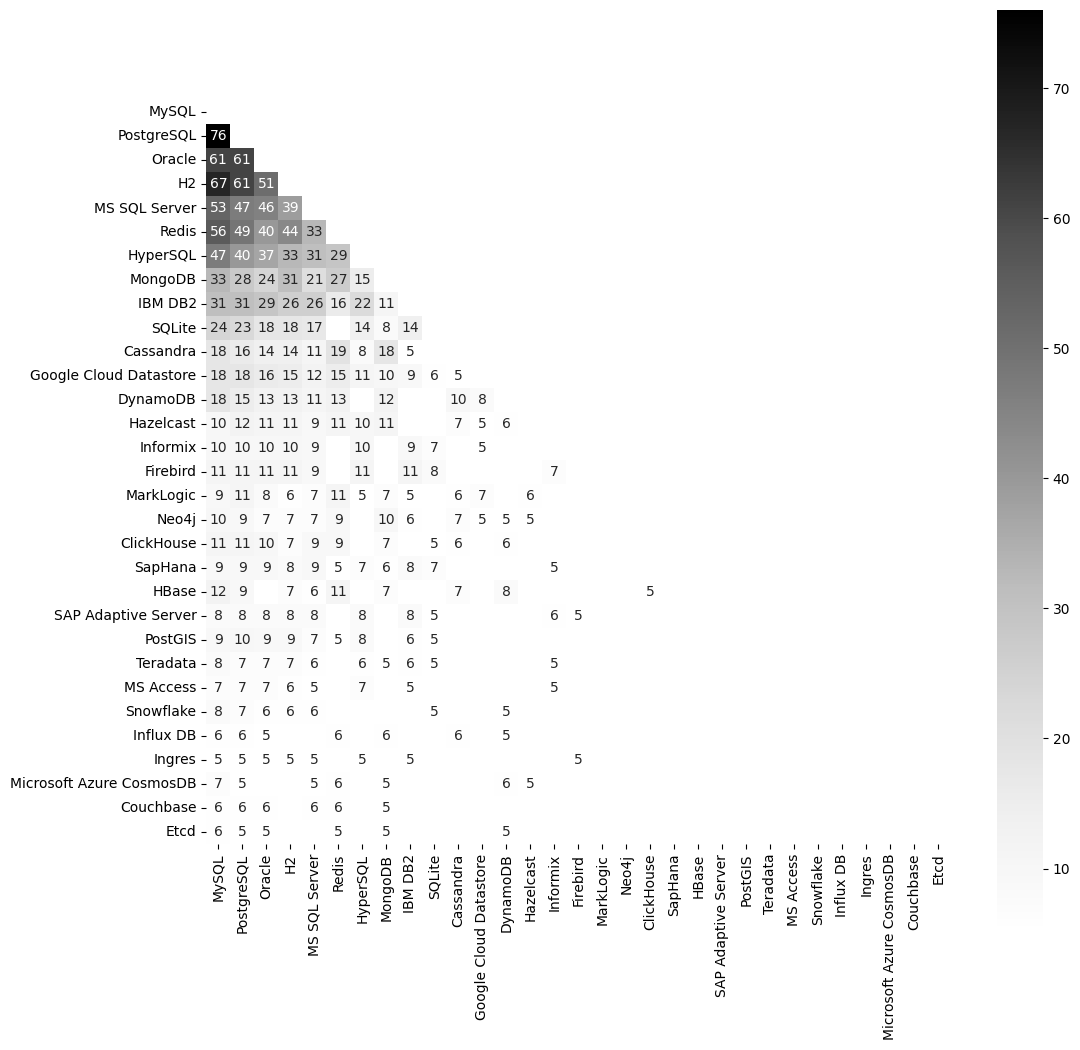

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ordena as linhas (Antecedents) para que as maiores somas venham primeiro
ordered_rows = pivot_filled.sum(axis=1).sort_values(ascending=False).index  # Ordena as linhas

# Ordena as colunas (Consequents) para que as maiores somas venham primeiro
ordered_cols = pivot_filled.sum(axis=0).sort_values(ascending=False).index  # Ordena as colunas

# Reordena a tabela pivotada tanto pelas linhas quanto pelas colunas
pivot_ordered = pivot_filled.loc[ordered_rows, ordered_cols]

# Cria a máscara para o triângulo superior na matriz reordenada
mask_lower = np.triu(np.ones(pivot_ordered.shape), k=0)

# Configura o heatmap com a tabela reordenada
sns.heatmap(
    pivot_ordered, 
    mask=mask_lower, 
    xticklabels=True, 
    yticklabels=True, 
    annot=True, 
    cmap=sns.color_palette("Greys", as_cmap=True), 
    square=True
)

# Adiciona legendas para os eixos X e Y
#plt.xlabel("Consequents")
#plt.ylabel("Antecedents")

# Ajusta o tamanho da figura
fig = plt.gcf()
fig.set_size_inches(12, 12)

# Salva o gráfico em um arquivo PDF
plt.savefig(IMAGES_DIR + "/heat_v10.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [25]:
lista = []
lista = orules1c['Antecedents'].drop_duplicates()
lista

0                       MySQL
30                 PostgreSQL
59                         H2
83                     Oracle
107                     Redis
126                  HyperSQL
142             MS SQL Server
164                   MongoDB
180                   IBM DB2
193                  DynamoDB
202    Google Cloud Datastore
209                    SQLite
217                 Cassandra
223                  Firebird
226                 Hazelcast
229                  Informix
233                     HBase
Name: Antecedents, dtype: category
Categories (31, object): ['MySQL', 'PostgreSQL', 'H2', 'Oracle', ..., 'Influx DB', 'Couchbase', 'Etcd', 'Ingres']

In [26]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')

In [27]:
pivot = pivot.reset_index()

In [28]:
pivot

Consequents,Antecedents,PostgreSQL,H2,Oracle,Redis,HyperSQL,MS SQL Server,MongoDB,IBM DB2,DynamoDB,...,SapHana,SAP Adaptive Server,Teradata,Snowflake,MS Access,Microsoft Azure CosmosDB,Influx DB,Couchbase,Etcd,Ingres
0,MySQL,76.0,67.0,61.0,56.0,47.0,53.0,33.0,31.0,18.0,...,9.0,8.0,8.0,8.0,7.0,7.0,6.0,6.0,6.0,5.0
1,PostgreSQL,NaN,61.0,61.0,49.0,40.0,47.0,28.0,31.0,15.0,...,9.0,8.0,7.0,7.0,7.0,5.0,6.0,6.0,5.0,5.0
2,H2,NaN,NaN,51.0,44.0,33.0,39.0,31.0,26.0,13.0,...,8.0,8.0,7.0,6.0,6.0,NaN,NaN,NaN,NaN,5.0
3,Oracle,NaN,NaN,NaN,NaN,37.0,46.0,24.0,29.0,13.0,...,9.0,8.0,7.0,6.0,7.0,NaN,5.0,6.0,5.0,5.0
4,Redis,NaN,NaN,40.0,NaN,29.0,33.0,27.0,16.0,13.0,...,5.0,NaN,NaN,NaN,NaN,6.0,6.0,6.0,5.0,NaN
5,HyperSQL,NaN,NaN,NaN,NaN,NaN,31.0,15.0,22.0,NaN,...,7.0,8.0,6.0,NaN,7.0,NaN,NaN,NaN,NaN,5.0
6,MS SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,21.0,26.0,11.0,...,9.0,8.0,6.0,6.0,5.0,5.0,NaN,6.0,NaN,5.0
7,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,12.0,...,6.0,NaN,5.0,NaN,NaN,5.0,6.0,5.0,5.0,NaN
8,IBM DB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,6.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
9,DynamoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,6.0,5.0,NaN,5.0,NaN


In [29]:
#Test generating the graph with all the rules ordered with the sort function
import plotly.express as px 
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#rules1c = rules1c.sort_values(['support_abs'], ascending=[False])
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
fig = px.scatter(orules1c, x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the last version',
hover_data=['support_abs'], color_continuous_scale = ["silver", "gray"], width=1000, height=1000, text= 'support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [30]:
#Test sorting only by support, after the sort function
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MySQL,PostgreSQL,0.484848,113.454545,0.402597,94.207792,0.329004,76,0.678571,1.685484,0.133806,1.858586,1.0,1.0
1,MySQL,H2,0.484848,113.454545,0.389610,91.168831,0.290043,67,0.598214,1.535417,0.101141,1.519192,1.0,1.0
30,PostgreSQL,H2,0.402597,94.207792,0.389610,91.168831,0.264069,61,0.655914,1.683513,0.107213,1.773945,1.0,1.0
2,MySQL,Oracle,0.484848,113.454545,0.341991,80.025974,0.264069,61,0.544643,1.592563,0.098255,1.445039,1.0,1.0
31,PostgreSQL,Oracle,0.402597,94.207792,0.341991,80.025974,0.264069,61,0.655914,1.917926,0.126384,1.912338,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Redis,SapHana,0.350649,82.051948,0.038961,9.116883,0.021645,5,0.061728,1.584362,0.007983,1.024265,1.0,1.0
204,Google Cloud Datastore,Cassandra,0.129870,30.389610,0.095238,22.285714,0.021645,5,0.166667,1.750000,0.009276,1.085714,1.0,1.0
205,Google Cloud Datastore,Hazelcast,0.129870,30.389610,0.073593,17.220779,0.021645,5,0.166667,2.264706,0.012087,1.111688,1.0,1.0
178,MongoDB,Couchbase,0.186147,43.558442,0.025974,6.077922,0.021645,5,0.116279,4.476744,0.016810,1.102187,1.0,1.0


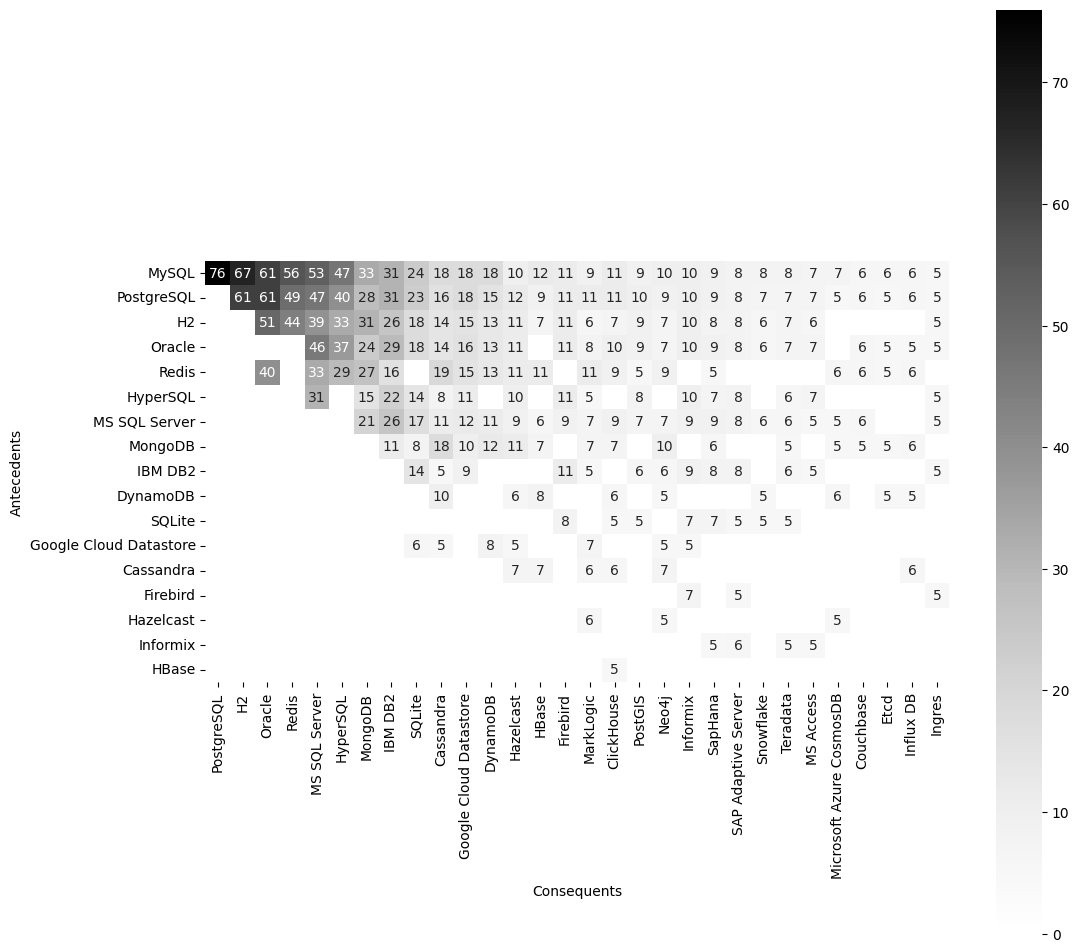

In [31]:
#Test sorting only by support, after the sort function
import seaborn as sns
pivot = orules1cd.pivot(index='Antecedents', columns='Consequents', values='support_abs')
#pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True, vmin=0, annot=True, cmap=sns.color_palette("Greys", as_cmap=True), square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.savefig(IMAGES_DIR+"/fig14.pdf", format="pdf", bbox_inches="tight")

In [32]:
num_unicos = orules1cd['Antecedents'].nunique()
#print(num_unicos)

colunas_unicas = orules1cd['Consequents'].nunique()
#print(colunas_unicas)

intersecao = set(orules1cd['Antecedents']).intersection(orules1cd['Consequents'])
tam_intersecao = len(intersecao)
#print(tam_intersecao)

dif1 = num_unicos - tam_intersecao
dif2 = colunas_unicas - tam_intersecao
Total = dif1 + dif2 + tam_intersecao

print(Total)

31


Running the cells grouping by consequents and antecedents to identify the most used DBs together

In [33]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.07)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents consequents                                                        
PostgreSQL  MySQL                               0.402597           94.207792   
MySQL       PostgreSQL                          0.484848          113.454545   
            H2                                  0.484848          113.454545   
H2          MySQL                               0.389610           91.168831   
            PostgreSQL                          0.389610           91.168831   
...                                                  ...                 ...   
Ingres      IBM DB2                             0.021645            5.064935   
PostgreSQL  Microsoft Azure CosmosDB            0.402597           94.207792   
Ingres      MS SQL Server                       0.021645            5.064935   
            MySQL                               0.021645            5.064935   
Teradata    SQLite                              0.034632            8.103896   

                                      consequent support  consequent_sup_abs  \
antecedents consequents                                                        
PostgreSQL  MySQL                               0.484848          113.454545   
MySQL       PostgreSQL                          0.402597           94.207792   
            H2                                  0.389610           91.168831   
H2          MySQL                               0.484848          113.454545   
            PostgreSQL                          0.402597           94.207792   
...                                                  ...                 ...   
Ingres      IBM DB2                             0.134199           31.402597   
PostgreSQL  Microsoft Azure CosmosDB            0.030303            7.090909   
Ingres      MS SQL Server                       0.238095           55.714286   
            MySQL                               0.484848          113.454545   
Teradata    SQLite                              0.125541           29.376623   

                                       support  support_abs  confidence  \
antecedents consequents                                                   
PostgreSQL  MySQL                     0.329004    76.987013    0.817204   
MySQL       PostgreSQL                0.329004    76.987013    0.678571   
            H2                        0.290043    67.870130    0.598214   
H2          MySQL                     0.290043    67.870130    0.744444   
            PostgreSQL                0.264069    61.792208    0.677778   
...                                        ...          ...         ...   
Ingres      IBM DB2                   0.021645     5.064935    1.000000   
PostgreSQL  Microsoft Azure CosmosDB  0.021645     5.064935    0.053763   
Ingres      MS SQL Server             0.021645     5.064935    1.000000   
            MySQL                     0.021645     5.064935    1.000000   
Teradata    SQLite                    0.021645     5.064935    0.625000   

                                          lift  leverage  conviction  \
antecedents consequents                                                
PostgreSQL  MySQL                     1.685484  0.133806    2.818182   
MySQL       PostgreSQL                1.685484  0.133806    1.858586   
            H2                        1.535417  0.101141    1.519192   
H2          MySQL                     1.535417  0.101141    2.015810   
            PostgreSQL                1.683513  0.107213    1.854008   
...                                        ...       ...         ...   
Ingres      IBM DB2                   7.451613  0.018740         inf   
PostgreSQL  Microsoft Azure CosmosDB  1.774194  0.009445    1.024793   
Ingres      MS SQL Server             4.200000  0.016491         inf   
            MySQL                     2.062500  0.011150         inf   
Teradata    SQLite                    4.978448  0.017297    2.331890   

                                      antec

In [34]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['consequent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.116306,27.215584,0.484848,113.454545,0.094372,22.083117,0.875548,1.805818,0.037982,NaN,1.0,1.0
PostgreSQL,0.119048,27.857143,0.402597,94.207792,0.088456,20.698701,0.827012,2.054191,0.040528,NaN,1.0,1.0
H2,0.133533,31.246753,0.389610,91.168831,0.086580,20.259740,0.717836,1.842446,0.034554,NaN,1.0,1.0
Redis,0.147776,34.579693,0.350649,82.051948,0.083628,19.569067,0.666196,1.899892,0.031811,NaN,1.0,1.0
Oracle,0.126314,29.557514,0.341991,80.025974,0.082560,19.319109,0.765079,2.237130,0.039362,NaN,1.0,1.0
HyperSQL,0.157081,36.756957,0.242424,56.727273,0.075036,17.558442,0.629080,2.594957,0.036956,NaN,1.0,1.0
MS SQL Server,0.131416,30.751391,0.238095,55.714286,0.071119,16.641929,0.659351,2.769274,0.039830,NaN,1.0,1.0
IBM DB2,0.160998,37.673469,0.134199,31.402597,0.059575,13.940631,0.543350,4.048835,0.037970,NaN,1.0,1.0
MongoDB,0.153586,35.939018,0.186147,43.558442,0.058724,13.741389,0.531264,2.853997,0.030134,NaN,1.0,1.0


In [35]:
#rules1ca = rules1c.groupby('antecedents').mean().sort_values(['antecedent_sup_abs','support_abs'], ascending=[False,False])
rules1ca = rules1c.groupby('antecedents').mean().sort_values('support', ascending=False)
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,113.454545,0.116306,27.215584,0.094372,22.083117,0.194643,1.805818,0.037982,1.139251,1.0,1.0
PostgreSQL,0.402597,94.207792,0.119048,27.857143,0.088456,20.698701,0.219713,2.054191,0.040528,1.218046,1.0,1.0
H2,0.389610,91.168831,0.133533,31.246753,0.086580,20.259740,0.222222,1.842446,0.034554,1.174398,1.0,1.0
Redis,0.350649,82.051948,0.147776,34.579693,0.083628,19.569067,0.238496,1.899892,0.031811,1.158954,1.0,1.0
Oracle,0.341991,80.025974,0.126314,29.557514,0.082560,19.319109,0.241410,2.237130,0.039362,1.254447,1.0,1.0
HyperSQL,0.242424,56.727273,0.157081,36.756957,0.075036,17.558442,0.309524,2.594957,0.036956,1.368591,1.0,1.0
MS SQL Server,0.238095,55.714286,0.131416,30.751391,0.071119,16.641929,0.298701,2.769274,0.039830,1.889820,1.0,1.0
IBM DB2,0.134199,31.402597,0.160998,37.673469,0.059575,13.940631,0.443932,4.048835,0.037970,NaN,1.0,1.0
MongoDB,0.186147,43.558442,0.153586,35.939018,0.058724,13.741389,0.315470,2.853997,0.030134,1.332750,1.0,1.0


In [36]:
# To filter only the 10 most used in the current version
rules1cb = rules1ca[(rules1ca['support'] >= 0.05)] 
rules1cb

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.484848,113.454545,0.116306,27.215584,0.094372,22.083117,0.194643,1.805818,0.037982,1.139251,1.0,1.0
PostgreSQL,0.402597,94.207792,0.119048,27.857143,0.088456,20.698701,0.219713,2.054191,0.040528,1.218046,1.0,1.0
H2,0.389610,91.168831,0.133533,31.246753,0.086580,20.259740,0.222222,1.842446,0.034554,1.174398,1.0,1.0
Redis,0.350649,82.051948,0.147776,34.579693,0.083628,19.569067,0.238496,1.899892,0.031811,1.158954,1.0,1.0
Oracle,0.341991,80.025974,0.126314,29.557514,0.082560,19.319109,0.241410,2.237130,0.039362,1.254447,1.0,1.0
HyperSQL,0.242424,56.727273,0.157081,36.756957,0.075036,17.558442,0.309524,2.594957,0.036956,1.368591,1.0,1.0
MS SQL Server,0.238095,55.714286,0.131416,30.751391,0.071119,16.641929,0.298701,2.769274,0.039830,1.889820,1.0,1.0
IBM DB2,0.134199,31.402597,0.160998,37.673469,0.059575,13.940631,0.443932,4.048835,0.037970,NaN,1.0,1.0
MongoDB,0.186147,43.558442,0.153586,35.939018,0.058724,13.741389,0.315470,2.853997,0.030134,1.332750,1.0,1.0


Identifying the antecedents and consequences that lead to the use of the 10 most used DBs

In [37]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
281,Informix,MySQL,0.043290,10.129870,0.484848,113.454545,0.043290,10.129870,1.000000,2.062500,0.022301,inf,1,1
283,SapHana,MySQL,0.038961,9.116883,0.484848,113.454545,0.038961,9.116883,1.000000,2.062500,0.020071,inf,1,1
285,IBM DB2,MySQL,0.134199,31.402597,0.484848,113.454545,0.134199,31.402597,1.000000,2.062500,0.069133,inf,1,1
287,Ingres,MySQL,0.021645,5.064935,0.484848,113.454545,0.021645,5.064935,1.000000,2.062500,0.011150,inf,1,1
290,MS Access,MySQL,0.030303,7.090909,0.484848,113.454545,0.030303,7.090909,1.000000,2.062500,0.015611,inf,1,1
292,SAP Adaptive Server,MySQL,0.034632,8.103896,0.484848,113.454545,0.034632,8.103896,1.000000,2.062500,0.017841,inf,1,1
293,ClickHouse,MySQL,0.047619,11.142857,0.484848,113.454545,0.047619,11.142857,1.000000,2.062500,0.024531,inf,1,1
295,Couchbase,MySQL,0.025974,6.077922,0.484848,113.454545,0.025974,6.077922,1.000000,2.062500,0.013381,inf,1,1
297,Firebird,MySQL,0.047619,11.142857,0.484848,113.454545,0.047619,11.142857,1.000000,2.062500,0.024531,inf,1,1
298,Microsoft Azure CosmosDB,MySQL,0.030303,7.090909,0.484848,113.454545,0.030303,7.090909,1.000000,2.062500,0.015611,inf,1,1


In [38]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
pd.set_option('display.max_rows', None)     # Exibe todas as linhas
pd.set_option('display.max_columns', None) 
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
202,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.043290,10.129870,1.000000,2.483871,0.025862,inf,1,1
203,PostgreSQL,PostGIS,0.402597,94.207792,0.043290,10.129870,0.043290,10.129870,0.107527,2.483871,0.025862,1.071976,1,1
204,Couchbase,PostgreSQL,0.025974,6.077922,0.402597,94.207792,0.025974,6.077922,1.000000,2.483871,0.015517,inf,1,1
205,PostgreSQL,Firebird,0.402597,94.207792,0.047619,11.142857,0.047619,11.142857,0.118280,2.483871,0.028448,1.080139,1,1
206,PostgreSQL,SAP Adaptive Server,0.402597,94.207792,0.034632,8.103896,0.034632,8.103896,0.086022,2.483871,0.020689,1.056226,1,1
207,SAP Adaptive Server,PostgreSQL,0.034632,8.103896,0.402597,94.207792,0.034632,8.103896,1.000000,2.483871,0.020689,inf,1,1
208,ClickHouse,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
209,PostgreSQL,ClickHouse,0.402597,94.207792,0.047619,11.142857,0.047619,11.142857,0.118280,2.483871,0.028448,1.080139,1,1
210,Firebird,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
211,Informix,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.043290,10.129870,1.000000,2.483871,0.025862,inf,1,1


In [39]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
191,Informix,H2,0.043290,10.129870,0.38961,91.168831,0.043290,10.129870,1.000000,2.566667,0.026424,inf,1,1
192,Firebird,H2,0.047619,11.142857,0.38961,91.168831,0.047619,11.142857,1.000000,2.566667,0.029066,inf,1,1
193,SAP Adaptive Server,H2,0.034632,8.103896,0.38961,91.168831,0.034632,8.103896,1.000000,2.566667,0.021139,inf,1,1
195,Ingres,H2,0.021645,5.064935,0.38961,91.168831,0.021645,5.064935,1.000000,2.566667,0.013212,inf,1,1
245,PostGIS,H2,0.043290,10.129870,0.38961,91.168831,0.038961,9.116883,0.900000,2.310000,0.022095,6.103896,1,1
246,SapHana,H2,0.038961,9.116883,0.38961,91.168831,0.034632,8.103896,0.888889,2.281481,0.019452,5.493506,1,1
253,Teradata,H2,0.034632,8.103896,0.38961,91.168831,0.030303,7.090909,0.875000,2.245833,0.016810,4.883117,1,1
260,MS Access,H2,0.030303,7.090909,0.38961,91.168831,0.025974,6.077922,0.857143,2.200000,0.014168,4.272727,1,1
268,IBM DB2,H2,0.134199,31.402597,0.38961,91.168831,0.112554,26.337662,0.838710,2.152688,0.060269,3.784416,1,1
323,Snowflake,H2,0.034632,8.103896,0.38961,91.168831,0.025974,6.077922,0.750000,1.925000,0.012481,2.441558,1,1


In [40]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
165,SapHana,Oracle,0.038961,9.116883,0.341991,80.025974,0.038961,9.116883,1.000000,2.924051,0.025637,inf,1,1
166,Informix,Oracle,0.043290,10.129870,0.341991,80.025974,0.043290,10.129870,1.000000,2.924051,0.028485,inf,1,1
168,Firebird,Oracle,0.047619,11.142857,0.341991,80.025974,0.047619,11.142857,1.000000,2.924051,0.031334,inf,1,1
169,SAP Adaptive Server,Oracle,0.034632,8.103896,0.341991,80.025974,0.034632,8.103896,1.000000,2.924051,0.022788,inf,1,1
170,Couchbase,Oracle,0.025974,6.077922,0.341991,80.025974,0.025974,6.077922,1.000000,2.924051,0.017091,inf,1,1
171,MS Access,Oracle,0.030303,7.090909,0.341991,80.025974,0.030303,7.090909,1.000000,2.924051,0.019940,inf,1,1
172,Ingres,Oracle,0.021645,5.064935,0.341991,80.025974,0.021645,5.064935,1.000000,2.924051,0.014243,inf,1,1
180,IBM DB2,Oracle,0.134199,31.402597,0.341991,80.025974,0.125541,29.376623,0.935484,2.735402,0.079646,10.199134,1,1
184,ClickHouse,Oracle,0.047619,11.142857,0.341991,80.025974,0.043290,10.129870,0.909091,2.658228,0.027005,7.238095,1,1
186,PostGIS,Oracle,0.043290,10.129870,0.341991,80.025974,0.038961,9.116883,0.900000,2.631646,0.024156,6.580087,1,1


In [41]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [61]:
rules7 = df[ (df['consequents'].str.contains('Redis')) ] #& (df['confidence'] > 0.7)]
rules7

unique_count = rules7['antecedents'].nunique()
print(f"Número de valores únicos em 'Antecedentes': {unique_count}")


Número de valores únicos em 'Antecedentes': 22


In [43]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
39,SapHana,SQLite,0.038961,9.116883,0.125541,29.376623,0.030303,7.090909,0.777778,6.195402,0.025412,3.935065,1,1
43,Firebird,SQLite,0.047619,11.142857,0.125541,29.376623,0.034632,8.103896,0.727273,5.793103,0.028654,3.206349,1,1
51,Informix,SQLite,0.043290,10.129870,0.125541,29.376623,0.030303,7.090909,0.700000,5.575862,0.024868,2.914863,1,1


In [44]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
53,Influx DB,MongoDB,0.025974,6.077922,0.186147,43.558442,0.025974,6.077922,1.000000,5.372093,0.021139,inf,1,1
69,Neo4j,MongoDB,0.047619,11.142857,0.186147,43.558442,0.043290,10.129870,0.909091,4.883721,0.034426,8.952381,1,1
72,Couchbase,MongoDB,0.025974,6.077922,0.186147,43.558442,0.021645,5.064935,0.833333,4.476744,0.016810,4.883117,1,1
76,Cassandra,MongoDB,0.095238,22.285714,0.186147,43.558442,0.077922,18.233766,0.818182,4.395349,0.060194,4.476190,1,1
108,Microsoft Azure CosmosDB,MongoDB,0.030303,7.090909,0.186147,43.558442,0.021645,5.064935,0.714286,3.837209,0.016004,2.848485,1,1
111,Etcd,MongoDB,0.030303,7.090909,0.186147,43.558442,0.021645,5.064935,0.714286,3.837209,0.016004,2.848485,1,1


In [45]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
85,SAP Adaptive Server,MS SQL Server,0.034632,8.103896,0.238095,55.714286,0.034632,8.103896,1.000000,4.200000,0.026386,inf,1,1
86,SapHana,MS SQL Server,0.038961,9.116883,0.238095,55.714286,0.038961,9.116883,1.000000,4.200000,0.029685,inf,1,1
88,Couchbase,MS SQL Server,0.025974,6.077922,0.238095,55.714286,0.025974,6.077922,1.000000,4.200000,0.019790,inf,1,1
91,Ingres,MS SQL Server,0.021645,5.064935,0.238095,55.714286,0.021645,5.064935,1.000000,4.200000,0.016491,inf,1,1
113,Informix,MS SQL Server,0.043290,10.129870,0.238095,55.714286,0.038961,9.116883,0.900000,3.780000,0.028654,7.619048,1,1
124,IBM DB2,MS SQL Server,0.134199,31.402597,0.238095,55.714286,0.112554,26.337662,0.838710,3.522581,0.080602,4.723810,1,1
130,ClickHouse,MS SQL Server,0.047619,11.142857,0.238095,55.714286,0.038961,9.116883,0.818182,3.436364,0.027623,4.190476,1,1
131,Firebird,MS SQL Server,0.047619,11.142857,0.238095,55.714286,0.038961,9.116883,0.818182,3.436364,0.027623,4.190476,1,1
142,Teradata,MS SQL Server,0.034632,8.103896,0.238095,55.714286,0.025974,6.077922,0.750000,3.150000,0.017728,3.047619,1,1
143,Snowflake,MS SQL Server,0.034632,8.103896,0.238095,55.714286,0.025974,6.077922,0.750000,3.150000,0.017728,3.047619,1,1


In [46]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [47]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [48]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
202,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.04329,10.12987,1.000000,2.483871,0.025862,inf,1,1
203,PostgreSQL,PostGIS,0.402597,94.207792,0.043290,10.129870,0.04329,10.12987,0.107527,2.483871,0.025862,1.071976,1,1


In [49]:
rules11a = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [50]:
rules12a = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12a

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
202,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.04329,10.12987,1.000000,2.483871,0.025862,inf,1,1
203,PostgreSQL,PostGIS,0.402597,94.207792,0.043290,10.129870,0.04329,10.12987,0.107527,2.483871,0.025862,1.071976,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [51]:
rulesTeste = df[ (df['consequents'] .str.contains('Cassandra')) & (df['confidence'] > 0.5) ]
rulesTeste

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
15,Influx DB,Cassandra,0.025974,6.077922,0.095238,22.285714,0.025974,6.077922,1.000000,10.500000,0.023500,inf,1,1
32,Neo4j,Cassandra,0.047619,11.142857,0.095238,22.285714,0.030303,7.090909,0.636364,6.681818,0.025768,2.488095,1,1
45,ClickHouse,Cassandra,0.047619,11.142857,0.095238,22.285714,0.025974,6.077922,0.545455,5.727273,0.021439,1.990476,1,1


In [52]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL') | (df['antecedents'].str.contains('PostgreSQL'))) & (df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
202,PostGIS,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.043290,10.129870,1.000000,2.483871,0.025862,inf,1,1
204,Couchbase,PostgreSQL,0.025974,6.077922,0.402597,94.207792,0.025974,6.077922,1.000000,2.483871,0.015517,inf,1,1
207,SAP Adaptive Server,PostgreSQL,0.034632,8.103896,0.402597,94.207792,0.034632,8.103896,1.000000,2.483871,0.020689,inf,1,1
208,ClickHouse,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
210,Firebird,PostgreSQL,0.047619,11.142857,0.402597,94.207792,0.047619,11.142857,1.000000,2.483871,0.028448,inf,1,1
211,Informix,PostgreSQL,0.043290,10.129870,0.402597,94.207792,0.043290,10.129870,1.000000,2.483871,0.025862,inf,1,1
213,Influx DB,PostgreSQL,0.025974,6.077922,0.402597,94.207792,0.025974,6.077922,1.000000,2.483871,0.015517,inf,1,1
214,SapHana,PostgreSQL,0.038961,9.116883,0.402597,94.207792,0.038961,9.116883,1.000000,2.483871,0.023275,inf,1,1
217,IBM DB2,PostgreSQL,0.134199,31.402597,0.402597,94.207792,0.134199,31.402597,1.000000,2.483871,0.080171,inf,1,1
218,Ingres,PostgreSQL,0.021645,5.064935,0.402597,94.207792,0.021645,5.064935,1.000000,2.483871,0.012931,inf,1,1


In [53]:
rules12 = df2[(df2['lift'] > 9)] #>20
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
2,Informix,SAP Adaptive Server,0.043290,10.129870,0.034632,8.103896,0.025974,6.077922,0.600000,17.325000,0.024475,2.413420,1,1
3,SAP Adaptive Server,Informix,0.034632,8.103896,0.043290,10.129870,0.025974,6.077922,0.750000,17.325000,0.024475,3.826840,1,1
4,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
5,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1,1
6,Informix,Firebird,0.043290,10.129870,0.047619,11.142857,0.030303,7.090909,0.700000,14.700000,0.028242,3.174603,1,1
7,Firebird,Informix,0.047619,11.142857,0.043290,10.129870,0.030303,7.090909,0.636364,14.700000,0.028242,2.630952,1,1
8,Informix,Teradata,0.043290,10.129870,0.034632,8.103896,0.021645,5.064935,0.500000,14.437500,0.020146,1.930736,1,1
9,Teradata,Informix,0.034632,8.103896,0.043290,10.129870,0.021645,5.064935,0.625000,14.437500,0.020146,2.551227,1,1


In [54]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)

In [55]:
rules14 = df2[(df2['confidence'] > 0.9)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
1,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
15,Influx DB,Cassandra,0.025974,6.077922,0.095238,22.285714,0.025974,6.077922,1.000000,10.500000,0.023500,inf,1,1
20,SAP Adaptive Server,IBM DB2,0.034632,8.103896,0.134199,31.402597,0.034632,8.103896,1.000000,7.451613,0.029984,inf,1,1
23,Ingres,IBM DB2,0.021645,5.064935,0.134199,31.402597,0.021645,5.064935,1.000000,7.451613,0.018740,inf,1,1
21,Firebird,IBM DB2,0.047619,11.142857,0.134199,31.402597,0.047619,11.142857,1.000000,7.451613,0.041229,inf,1,1
53,Influx DB,MongoDB,0.025974,6.077922,0.186147,43.558442,0.025974,6.077922,1.000000,5.372093,0.021139,inf,1,1
69,Neo4j,MongoDB,0.047619,11.142857,0.186147,43.558442,0.043290,10.129870,0.909091,4.883721,0.034426,8.952381,1,1
85,SAP Adaptive Server,MS SQL Server,0.034632,8.103896,0.238095,55.714286,0.034632,8.103896,1.000000,4.200000,0.026386,inf,1,1
86,SapHana,MS SQL Server,0.038961,9.116883,0.238095,55.714286,0.038961,9.116883,1.000000,4.200000,0.029685,inf,1,1
88,Couchbase,MS SQL Server,0.025974,6.077922,0.238095,55.714286,0.025974,6.077922,1.000000,4.200000,0.019790,inf,1,1


In [56]:
#Top 10 rules with highest lifts in the End of the project life cycle
rules15 = df2[(df2['lift'] > 4)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)
rules15 = rules15.rename(columns={'antecedents': 'Antecedents'})
rules15 = rules15.rename(columns={'consequents': 'Consequents'})
rules15 = rules15.rename(columns={'lift': 'Lift'})
display(rules15)

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,Lift,leverage,conviction,antecedent_len,consequente_len
0,Firebird,Ingres,0.047619,11.142857,0.021645,5.064935,0.021645,5.064935,0.454545,21.000000,0.020614,1.793651,1,1
1,Ingres,Firebird,0.021645,5.064935,0.047619,11.142857,0.021645,5.064935,1.000000,21.000000,0.020614,inf,1,1
2,Informix,SAP Adaptive Server,0.043290,10.129870,0.034632,8.103896,0.025974,6.077922,0.600000,17.325000,0.024475,2.413420,1,1
3,SAP Adaptive Server,Informix,0.034632,8.103896,0.043290,10.129870,0.025974,6.077922,0.750000,17.325000,0.024475,3.826840,1,1
4,MS Access,Informix,0.030303,7.090909,0.043290,10.129870,0.021645,5.064935,0.714286,16.500000,0.020333,3.348485,1,1
5,Informix,MS Access,0.043290,10.129870,0.030303,7.090909,0.021645,5.064935,0.500000,16.500000,0.020333,1.939394,1,1
6,Informix,Firebird,0.043290,10.129870,0.047619,11.142857,0.030303,7.090909,0.700000,14.700000,0.028242,3.174603,1,1
7,Firebird,Informix,0.047619,11.142857,0.043290,10.129870,0.030303,7.090909,0.636364,14.700000,0.028242,2.630952,1,1
8,Informix,Teradata,0.043290,10.129870,0.034632,8.103896,0.021645,5.064935,0.500000,14.437500,0.020146,1.930736,1,1
9,Teradata,Informix,0.034632,8.103896,0.043290,10.129870,0.021645,5.064935,0.625000,14.437500,0.020146,2.551227,1,1


In [57]:
#rules15_filter = rules15.to_excel('rules_filters_liftv10.xlsx', index=False)

In [58]:
#Comparando as regras V10 com as regras V1 para encontrar Lifts que aumentaram com o tempo

rulesExample = rules15 = rules15.sort_values(['Lift'], ascending=False)
rulesExample = rulesExample.rename(columns={'Lift': 'Lift_rule'})

dfV1 = pd.read_excel('rules_filtersv1_order.xlsx', keep_default_na=False)
dfV1 = dfV1.rename(columns={'lift': 'lift_dfV1'})

# Faz um merge entre rulesExample e dfV1 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(rulesExample, dfV1, on=['Antecedents', 'Consequents'], suffixes=('_rule', '_dfV1'))
# Filtra as linhas onde o Lift de dfV1 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV1'] < merged_df['Lift_rule']]

# Exibe os resultados
result


,Antecedents,Consequents,antecedent support_rule,antecedent_sup_abs_rule,consequent support_rule,consequent_sup_abs_rule,support_rule,support_abs_rule,confidence_rule,Lift_rule,leverage_rule,conviction_rule,antecedent_len_rule,consequente_len_rule,antecedent support_dfV1,antecedent_sup_abs_dfV1,consequent support_dfV1,consequent_sup_abs_dfV1,support_dfV1,support_abs_dfV1,confidence_dfV1,lift_dfV1,leverage_dfV1,conviction_dfV1,antecedent_len_dfV1,consequente_len_dfV1


In [59]:
#Comparando as regras V10 com as regras V5 para encontrar Lifts que aumentaram com o tempo

rulesExample = rules15 = rules15.sort_values(['Lift'], ascending=False)
rulesExample = rulesExample.rename(columns={'Lift': 'Lift_rule'})

dfV5 = pd.read_excel('rules_filtersv5_order.xlsx', keep_default_na=False)
dfV5 = dfV5.rename(columns={'antecedents': 'Antecedents'})
dfV5 = dfV5.rename(columns={'consequents': 'Consequents'})
dfV5 = dfV5.rename(columns={'lift': 'lift_dfV5'})

# Faz um merge entre rulesExample e dfV5 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(rulesExample, dfV5, on=['Antecedents', 'Consequents'], suffixes=('_rule', '_dfV5'))
# Filtra as linhas onde o Lift de dfV5 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV5'] < merged_df['Lift_rule']]

# Calcula a diferença entre os Lifts
result['Lift_diff'] = result['Lift_rule'] - result['lift_dfV5']

# Ordena pela diferença de Lift, do maior para o menor
result_sorted = result.sort_values(by='Lift_diff', ascending=False)

# Exibe os resultados ordenados
result_sorted


/var/folders/kc/q64njxfx5xj09h4nrxwncwbw0000gn/T/ipykernel_23326/2295853919.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Antecedents,Consequents,antecedent support_rule,antecedent_sup_abs_rule,consequent support_rule,consequent_sup_abs_rule,support_rule,support_abs_rule,confidence_rule,Lift_rule,leverage_rule,conviction_rule,antecedent_len_rule,consequente_len_rule,antecedent support_dfV5,antecedent_sup_abs_dfV5,consequent support_dfV5,consequent_sup_abs_dfV5,support_dfV5,support_abs_dfV5,confidence_dfV5,lift_dfV5,leverage_dfV5,conviction_dfV5,antecedent_len_dfV5,consequente_len_dfV5,Lift_diff
0,SAP Adaptive Server,Informix,0.034632,8.103896,0.043290,10.129870,0.025974,6.077922,0.750000,17.3250,0.024475,3.826840,1,1,0.043478,10.173913,0.043478,10.173913,0.026087,6,0.600000,13.800000,0.024197,2.391304,1,1,3.525000
28,HyperSQL,MS Access,0.242424,56.727273,0.030303,7.090909,0.030303,7.090909,0.125000,4.1250,0.022957,1.108225,1,1,0.273913,64.095652,0.039130,9.156522,0.034783,8,0.126984,3.245150,0.024064,1.100632,1,1,0.879850
27,SAP Adaptive Server,HyperSQL,0.034632,8.103896,0.242424,56.727273,0.034632,8.103896,1.000000,4.1250,0.026236,inf,1,1,0.043478,10.173913,0.273913,64.095652,0.039130,9,0.900000,3.285714,0.027221,7.260870,1,1,0.839286
26,HyperSQL,Firebird,0.242424,56.727273,0.047619,11.142857,0.047619,11.142857,0.196429,4.1250,0.036075,1.185185,1,1,0.273913,64.095652,0.034783,8.139130,0.034783,8,0.126984,3.650794,0.025255,1.105613,1,1,0.474206
29,Informix,HyperSQL,0.043290,10.129870,0.242424,56.727273,0.043290,10.129870,1.000000,4.1250,0.032795,inf,1,1,0.043478,10.173913,0.273913,64.095652,0.043478,10,1.000000,3.650794,0.031569,inf,1,1,0.474206
2,Teradata,Informix,0.034632,8.103896,0.043290,10.129870,0.021645,5.064935,0.625000,14.4375,0.020146,2.551227,1,1,0.034783,8.139130,0.043478,10.173913,0.021739,5,0.625000,14.375000,0.020227,2.550725,1,1,0.062500


In [60]:
dfV1 = pd.read_excel('rules_filtersv1_order.xlsx', keep_default_na=False)
dfV1 = dfV1.rename(columns={'lift': 'lift_dfV1'})

dfV5 = pd.read_excel('rules_filtersv5_order.xlsx', keep_default_na=False)
dfV5 = dfV5.rename(columns={'antecedents': 'Antecedents'})
dfV5 = dfV5.rename(columns={'consequents': 'Consequents'})
dfV5 = dfV5.rename(columns={'lift': 'lift_dfV5'})

# Faz um merge entre rulesExample e dfV5 com base nas colunas 'Antecedents' e 'Consequents'
merged_df = pd.merge(dfV5, dfV1, on=['Antecedents', 'Consequents'], suffixes=('_dfV5', '_dfV1'))
# Filtra as linhas onde o Lift de dfV5 é menor que o Lift de rulesExample
result = merged_df[merged_df['lift_dfV1'] < merged_df['lift_dfV5']]

# Calcula a diferença entre os Lifts
result['Lift_diff'] = result['lift_dfV5'] - result['lift_dfV1']

# Ordena pela diferença de Lift, do maior para o menor
result_sorted = result.sort_values(by='Lift_diff', ascending=False)

# Exibe os resultados ordenados
result_sorted

,Antecedents,Consequents,antecedent support_dfV5,antecedent_sup_abs_dfV5,consequent support_dfV5,consequent_sup_abs_dfV5,support_dfV5,support_abs_dfV5,confidence_dfV5,lift_dfV5,leverage_dfV5,conviction_dfV5,antecedent_len_dfV5,consequente_len_dfV5,antecedent support_dfV1,antecedent_sup_abs_dfV1,consequent support_dfV1,consequent_sup_abs_dfV1,support_dfV1,support_abs_dfV1,confidence_dfV1,lift_dfV1,leverage_dfV1,conviction_dfV1,antecedent_len_dfV1,consequente_len_dfV1,Lift_diff
